# Introduction
1. 데이터 전처리
2. Random Forest 모델 구축
  -  k-fold cross validation 활용
3. 예측 결과 평가 및 중요 변수 산출

In [15]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 데이터셋
from sklearn.datasets import load_breast_cancer, load_boston

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from scipy.stats import spearmanr

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

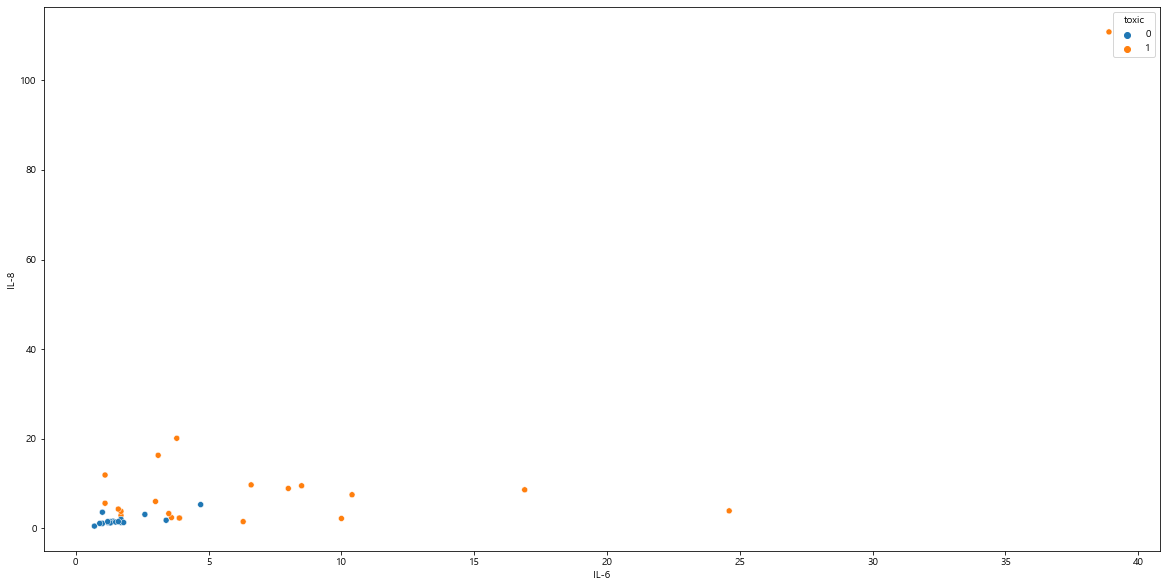

In [16]:
hptc1 = pd.read_csv('HPTC1.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc1, x = 'IL-6',y='IL-8',hue='toxic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

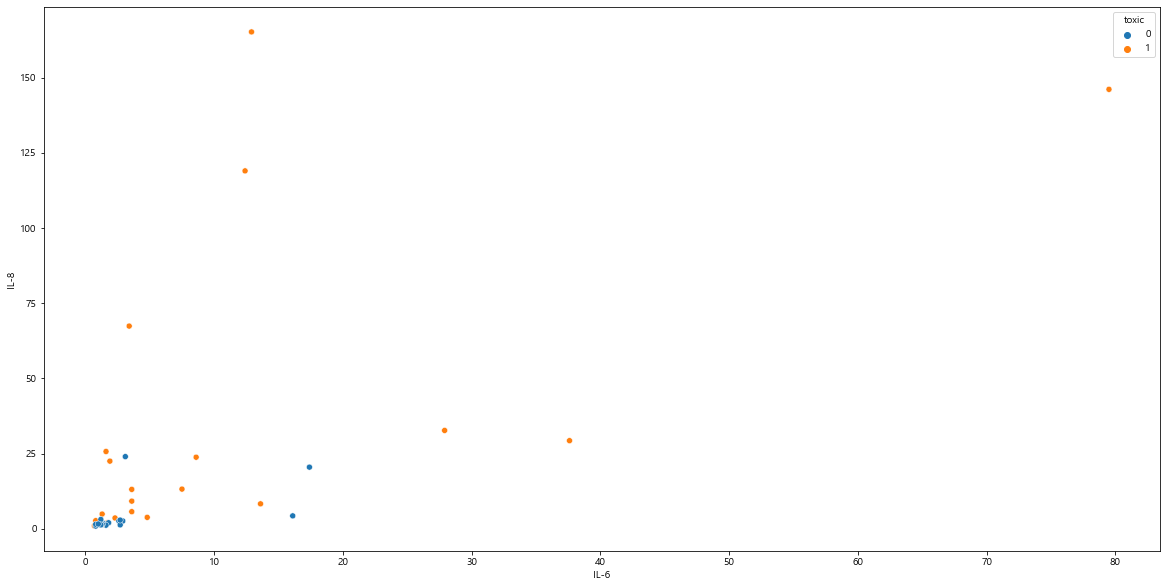

In [17]:
hptc2 = pd.read_csv('HPTC2.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc2, x = 'IL-6',y='IL-8',hue='toxic')

<AxesSubplot:xlabel='IL-6', ylabel='IL-8'>

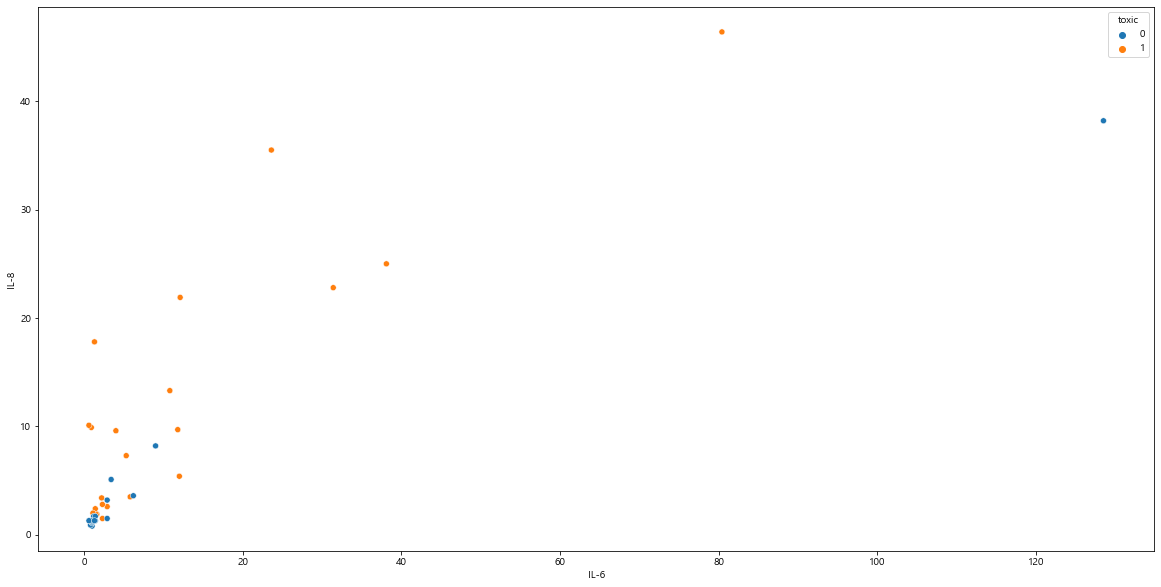

In [18]:
hptc3 = pd.read_csv('HPTC3.csv')
plt.figure(figsize=(20,10))
sns.scatterplot(data=hptc3, x = 'IL-6',y='IL-8',hue='toxic')

In [19]:
X1 = pd.DataFrame(hptc1, columns=['IL-6','IL-8']).to_numpy()
y1 = pd.DataFrame(hptc1, columns=['toxic']).to_numpy()
X2 = pd.DataFrame(hptc2, columns=['IL-6','IL-8']).to_numpy()
y2 = pd.DataFrame(hptc2, columns=['toxic']).to_numpy()
X3 = pd.DataFrame(hptc3, columns=['IL-6','IL-8']).to_numpy()
y3 = pd.DataFrame(hptc3, columns=['toxic']).to_numpy()

## 모델링
* 하이퍼파라미터 결정

### 4.1 단순 모델링(사용자가 하이퍼파라미터 정의)

In [26]:
clf = RandomForestClassifier(n_estimators=10,random_state=2021)
cv_scores_1 = []
leaf_list = [50,100,150,200,250,300,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000]

for max_leaf_nodes in leaf_list:
    clf = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes)

    skfold = StratifiedKFold(n_splits=3)
    cv1_bacc = []
    cv1_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(X1, y1):
        X1_train, X1_test = X1[train_index], X1[test_index]
        y1_train, y1_test = y1[train_index], y1[test_index]

        #학습 및 예측 
        clf.fit(X1_train , y1_train)    
        pred = clf.predict(X1_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv1_bacc.append(balanced_accuracy_score(y_true =y1_test, y_pred=pred))
        cv1_recall.append(recall_score(y_true=y1_test, y_pred=pred))
    cv_scores_1.append([np.mean(cv1_bacc),np.mean(cv1_recall),2*np.mean(cv1_bacc)-np.mean(cv1_recall)])

cv_scores_1

[[0.8045634920634921, 0.7678571428571429, 0.8412698412698413],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8283730158730159, 0.8154761904761906, 0.8412698412698413],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8045634920634921, 0.7678571428571429, 0.8412698412698413],
 [0.7807539682539684, 0.7202380952380952, 0.8412698412698415],
 [0.8015873015873017, 0.7619047619047619, 0.8412698412698416],
 [0.7738095238095238, 0.7619047619047619, 0.7857142857142858],
 [0.7976190476190478, 0.8095238095238096, 0.7857142857142859],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8015873015873017, 0.7619047619047619, 0.8412698412698416],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8253968253968255, 0.8095238095238096, 0.8412698412698413],
 [0.8015873015873017, 0.7619047619047619, 0.84126984126

In [27]:
cv_scores_2 = []

for max_leaf_nodes in leaf_list:
    clf = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes)
    
    skfold = StratifiedKFold(n_splits=3)
    cv2_bacc = []
    cv2_recall = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(X2, y2):
        X2_train, X2_test = X2[train_index], X2[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]

        #학습 및 예측 
        clf.fit(X2_train , y2_train)    
        pred = clf.predict(X2_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv2_bacc.append(balanced_accuracy_score(y_true =y2_test, y_pred=pred))
        cv2_recall.append(recall_score(y_true=y2_test, y_pred=pred))
    cv_scores_2.append([np.mean(cv2_bacc),np.mean(cv2_recall),2*np.mean(cv2_bacc)-np.mean(cv2_recall)])

cv_scores_2

[[0.6795634920634921, 0.7321428571428572, 0.626984126984127],
 [0.6795634920634921, 0.7321428571428572, 0.626984126984127],
 [0.6795634920634921, 0.7321428571428572, 0.626984126984127],
 [0.6795634920634921, 0.7321428571428572, 0.626984126984127],
 [0.6865079365079364, 0.6904761904761906, 0.6825396825396822],
 [0.7073412698412698, 0.7321428571428572, 0.6825396825396823],
 [0.7073412698412698, 0.7321428571428572, 0.6825396825396823],
 [0.6517857142857143, 0.7321428571428572, 0.5714285714285714],
 [0.6587301587301587, 0.6904761904761906, 0.6269841269841269],
 [0.6795634920634921, 0.7321428571428572, 0.626984126984127],
 [0.7073412698412698, 0.7321428571428572, 0.6825396825396823],
 [0.7073412698412698, 0.7321428571428572, 0.6825396825396823],
 [0.6865079365079364, 0.6904761904761906, 0.6825396825396822],
 [0.6865079365079364, 0.6904761904761906, 0.6825396825396822],
 [0.6557539682539683, 0.7321428571428572, 0.5793650793650793],
 [0.6795634920634921, 0.7321428571428572, 0.626984126984127]

In [28]:
cv_scores_3 = []

for max_leaf_nodes in leaf_list:
    clf = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes)
    
    skfold = StratifiedKFold(n_splits=3)
    cv3_bacc = []
    cv3_recall = []
    cv3_precision = []
    n_iter=0
    
    # StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
    for train_index, test_index  in skfold.split(X3, y3):
        X3_train, X3_test = X3[train_index], X3[test_index]
        y3_train, y3_test = y3[train_index], y3[test_index]

        #학습 및 예측 
        clf.fit(X3_train , y3_train)    
        pred = clf.predict(X3_test)

        # 반복 시 마다 정확도 측정 
        n_iter += 1
        cv3_bacc.append(balanced_accuracy_score(y_true =y3_test, y_pred=pred))
        cv3_recall.append(recall_score(y_true=y3_test, y_pred=pred))
        cv3_precision.append(precision_score(y_true=y3_test, y_pred=pred))
    cv_scores_3.append([np.mean(cv3_bacc),np.mean(cv3_recall),2*np.mean(cv3_bacc)-np.mean(cv3_recall)])

cv_scores_3

[[0.7242063492063492, 0.7738095238095237, 0.6746031746031746],
 [0.8174603174603176, 0.9047619047619048, 0.7301587301587303],
 [0.7966269841269842, 0.8630952380952381, 0.7301587301587302],
 [0.7242063492063492, 0.7738095238095238, 0.6746031746031745],
 [0.7896825396825397, 0.9047619047619048, 0.6746031746031745],
 [0.8174603174603176, 0.9047619047619048, 0.7301587301587303],
 [0.7450396825396824, 0.8154761904761906, 0.6746031746031743],
 [0.7242063492063492, 0.7738095238095237, 0.6746031746031746],
 [0.7688492063492064, 0.8630952380952381, 0.6746031746031746],
 [0.7658730158730158, 0.8571428571428571, 0.6746031746031745],
 [0.8174603174603176, 0.9047619047619048, 0.7301587301587303],
 [0.7658730158730158, 0.8571428571428572, 0.6746031746031744],
 [0.748015873015873, 0.8214285714285715, 0.6746031746031745],
 [0.7242063492063492, 0.7738095238095237, 0.6746031746031746],
 [0.748015873015873, 0.8214285714285715, 0.6746031746031745],
 [0.8174603174603176, 0.9047619047619048, 0.7301587301587

In [29]:
mean_cv_scores = []

for i in range(14):
    mean_bacc = (cv_scores_1[i][0] + cv_scores_2[i][0] + cv_scores_3[i][0])/3
    mean_recall = (cv_scores_1[i][1] + cv_scores_2[i][1] + cv_scores_3[i][1])/3
    mean_precision = (cv_scores_1[i][2] + cv_scores_2[i][2] + cv_scores_3[i][2])/3
    mean_cv_scores.append([mean_bacc,mean_recall,mean_precision])

mean_cv_scores

[[0.7361111111111112, 0.7579365079365079, 0.7142857142857144],
 [0.7741402116402117, 0.8154761904761906, 0.7328042328042329],
 [0.7681878306878307, 0.8035714285714287, 0.7328042328042329],
 [0.7430555555555557, 0.7718253968253969, 0.7142857142857143],
 [0.7671957671957671, 0.8015873015873017, 0.7328042328042327],
 [0.7764550264550265, 0.8015873015873015, 0.7513227513227513],
 [0.7443783068783069, 0.755952380952381, 0.7328042328042327],
 [0.7258597883597884, 0.7559523809523809, 0.6957671957671959],
 [0.7337962962962963, 0.7718253968253969, 0.6957671957671957],
 [0.7476851851851852, 0.7996031746031748, 0.6957671957671958],
 [0.783399470899471, 0.8154761904761906, 0.7513227513227513],
 [0.7662037037037037, 0.7996031746031748, 0.7328042328042327],
 [0.7453703703703703, 0.757936507936508, 0.7328042328042327],
 [0.7453703703703703, 0.7579365079365079, 0.7328042328042327]]

### 4.2 단일 하이퍼 파라미터에 대한 Grid search

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.66it/s]


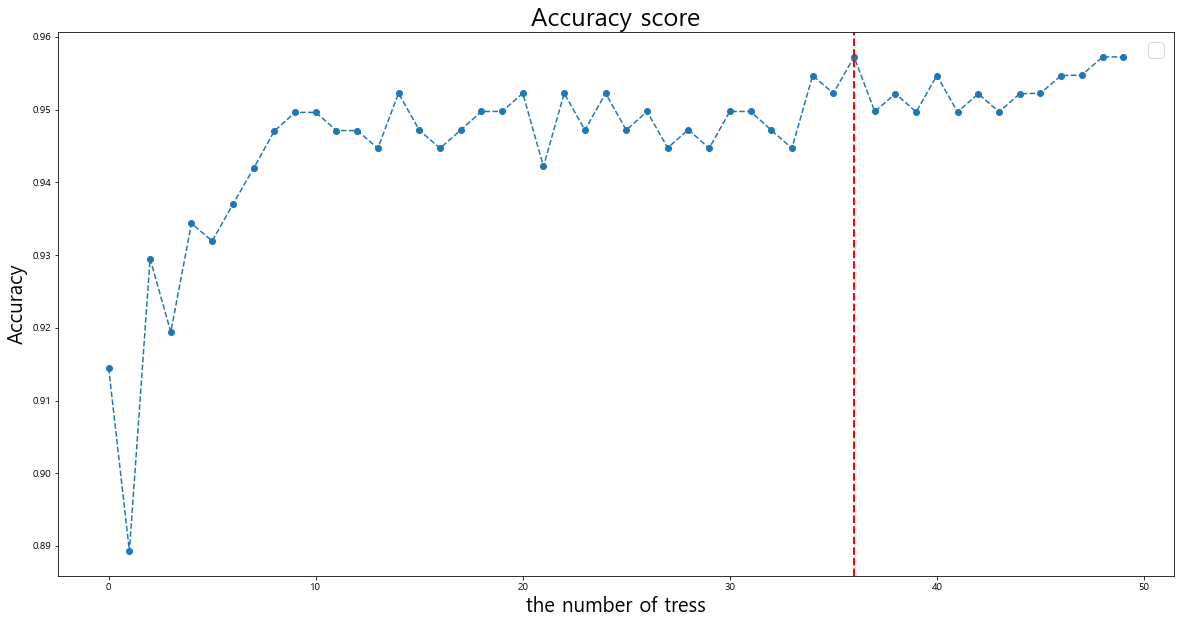

In [25]:
cv_scores=[]
estimator_list = [i for i in range(0,50)]
for i in tqdm(range(0,50)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=1,
                                random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

    
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores,marker='o',linestyle='dashed')
plt.xlabel("the number of tress", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy score", fontsize=25)
plt.axvline(best_e[0],color='r',linestyle='--',linewidth=2)
plt.show()

In [31]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")
print("Train set에 대한 성능 (10 fold cross validation)")
print(f"정확도:{max(cv_scores):0.4f}")

최적의 tree개수:37


Train set에 대한 성능 (10 fold cross validation)
정확도:0.9572


In [32]:
rfc = RandomForestClassifier(n_estimators=37,random_state=2021)
rfc.fit(X_train,y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred=y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred=y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9766


### 4.3 전체 파라미터에 대한 Grid search (파라미터 최적화)

In [43]:
rfc = RandomForestClassifier(random_state=2021)
param_grid = {
    'n_estimators' : [30,40,50,60],
    'max_depth': [5,10,15,20],
    'max_leaf_nodes' : [50,100,150,200,250,300,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=5)
cv_scores_1 = []
skfold = StratifiedKFold(n_splits=3)
n_iter=0

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(X1, y1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

    #학습 및 예측 
    CV_rfc.fit(X1_train, y1_train)
    pred = CV_rfc.predict(X1_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    cv1_bacc.append(balanced_accuracy_score(y_true =y1_test, y_pred=pred))
    cv1_recall.append(recall_score(y_true=y1_test, y_pred=pred))
cv_scores_1.append([np.mean(cv1_bacc),np.mean(cv1_recall),2*np.mean(cv1_bacc)-np.mean(cv1_recall)])

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    7.0s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:   16.8s
[Parallel(n_jobs=5)]: Done 1570 tasks      | elapsed:   30.7s
[Parallel(n_jobs=5)]: Done 2470 tasks      | elapsed:   50.0s
[Parallel(n_jobs=5)]: Done 2880 out of 2880 | elapsed:   58.9s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 150],
                         'n_estimators': [30, 40, 50, 60]},
             verbose=1)

In [44]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'n_estimators': 40}

In [46]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params','mean_test_score']])

                                                params  mean_test_score
185  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.962308
221  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.962308
269  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.962308
265  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.962308
181  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.962308
..                                                 ...              ...
52   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.942051
48   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.942051
44   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.942051
40   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.942051
80   {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.942051

[288 rows x 2 columns]


In [47]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       n_estimators=40, random_state=2021)

In [48]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred=y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred=y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9825


In [50]:
recall =recall_score(y_true=y_test, y_pred=y_pred)
precision =precision_score(y_true=y_test, y_pred=y_pred)

print(f"정확도{acc:0.4f}", f"민감도:{recall:0.4f}", f"정밀도:{precision:0.4f}", sep=" | ")

정확도0.9825 | 민감도:0.9907 | 정밀도:0.9815


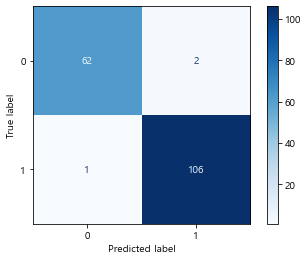

In [51]:
plot_confusion_matrix(best_rfc,X_test,y_test, cmap=plt.cm.Blues)
plt.show()

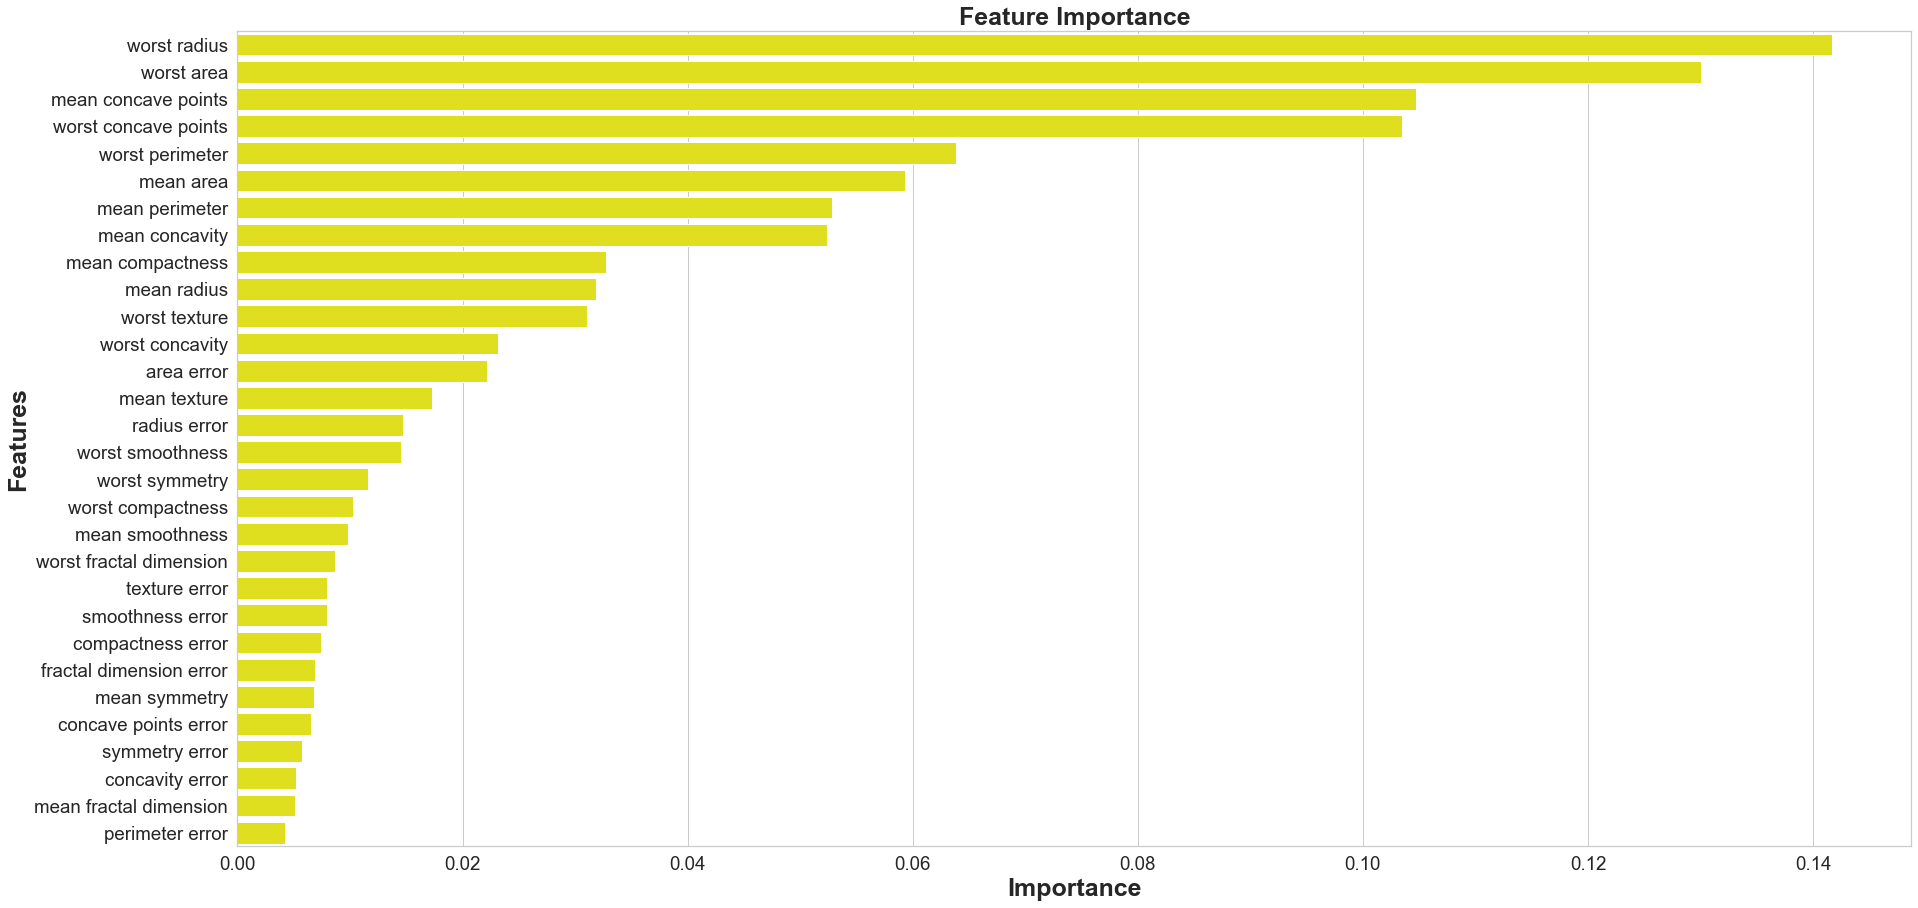

None

,Features,Gini-Importance
0,worst radius,0.141654
1,worst area,0.130019
2,mean concave points,0.104700
3,worst concave points,0.103489
4,worst perimeter,0.063877
5,mean area,0.059299
6,mean perimeter,0.052850
7,mean concavity,0.052376
8,mean compactness,0.032771
9,mean radius,0.031817


In [63]:
feats = {}
for feature, importance in zip(breast_cancer.feature_names, best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale=5)
sns.set(style="whitegrid",color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color = 'yellow')
plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### 4.4 타 알고리즘과의 비교

In [ ]:
# kNN
